In [1]:
import numpy as np
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Tesla.csv')
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


In [5]:
df['Date'].head(7)

0    6/29/2010
1    6/30/2010
2     7/1/2010
3     7/2/2010
4     7/6/2010
5     7/7/2010
6     7/8/2010
Name: Date, dtype: object

In [10]:
df[['Date']] = df[['Date']].apply(pd.to_datetime) 
df['Date'] = df['Date'].dt.strftime('%Y')
df['Date'] = df['Date'].astype(np.int64)
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   int64  
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 92.7 KB


<Axes: xlabel='Volume', ylabel='Adj Close'>

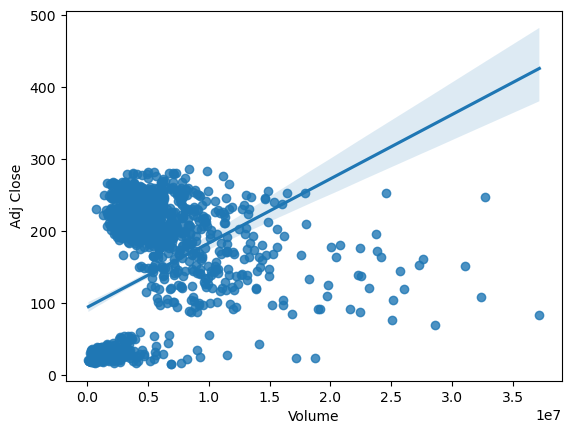

In [13]:
sns.regplot(data = df, x = 'Volume', y = 'Adj Close')

In [16]:
df.dtypes

Date           int64
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

### Checking of the null values 

In [18]:
df.duplicated().value_counts()

False    1692
Name: count, dtype: int64

In [19]:
# Splitting of the data  into X and Y
x = df.drop(columns = ['Adj Close'])
x.head()

,Date,Open,High,Low,Close,Volume
0,2010,19.000000,25.00,17.540001,23.889999,18766300
1,2010,25.790001,30.42,23.299999,23.830000,17187100
2,2010,25.000000,25.92,20.270000,21.959999,8218800
3,2010,23.000000,23.10,18.709999,19.200001,5139800
4,2010,20.000000,20.00,15.830000,16.110001,6866900


In [21]:
y = df['Adj Close']
y.head()

0    23.889999
1    23.830000
2    21.959999
3    19.200001
4    16.110001
Name: Adj Close, dtype: float64

In [22]:
from sklearn.preprocessing import StandardScaler

In [26]:
# Standard Scaling all the columns in one go
std_scaler = StandardScaler()
column = list(df.columns)
column.remove('Adj Close')
x = pd.DataFrame(std_scaler.fit_transform(x), columns = column)

In [27]:
x.head()

,Date,Open,High,Low,Close,Volume
0,-1.692373,-1.203215,-1.147419,-1.211450,-1.151173,3.375219
1,-1.692373,-1.131197,-1.090764,-1.149400,-1.151809,3.007510
2,-1.692373,-1.139576,-1.137802,-1.182041,-1.171642,0.919286
3,-1.692373,-1.160789,-1.167280,-1.198846,-1.200915,0.202356
4,-1.692373,-1.192608,-1.199684,-1.229871,-1.233688,0.604503


### Splitting of the data into training and testing

In [28]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3, random_state = 30)

In [34]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((1184, 6), (508, 6), (1184,), (508,))

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [39]:
# Fitting of X_train and Y_train into Linear Regression

In [41]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)

LinearRegression()

In [50]:
y_pred_lin_reg = lin_reg.predict(X_test)

In [52]:
score_lin_reg = r2_score(Y_test, y_pred_lin_reg)
mae_lin_reg = mean_absolute_error(Y_test, y_pred_lin_reg)
mse_lin_reg = mean_squared_error(Y_test, y_pred_lin_reg)
rmse_lin_reg = np.sqrt(mse_lin_reg)
print("the R2 Score for Linear Regression", score_lin_reg)
print("The MAE Score for Linear Regression", mae_lin_reg)
print("The MSE Score for Linear Regression", mse_lin_reg)
print("The RMSE Score for inear REgression", rmse_lin_reg)

the R2 Score for Linear Regression 1.0
The MAE Score for Linear Regression 1.1295251698091908e-13
The MSE Score for Linear Regression 1.4983412842659414e-26
The RMSE Score for inear REgression 1.2240675162203845e-13


# Support Vector Machine 

In [55]:
svr = SVR(kernel = 'rbf')
svr.fit(X_train, Y_train)

SVR()

In [56]:
y_pred_svm = svr.predict(X_test)

In [58]:
score_svr = r2_score(Y_test, y_pred_svm)
mse_svr = mean_squared_error(Y_test, y_pred_svm)
mae_svr = mean_absolute_error(Y_test, y_pred_svm)
rmse_svr = np.sqrt(mse_svr)

In [60]:
print("The R2 score for SVM is ", score_svr)
print("The MSE Score for SVM is ", mse_svr)
print("The MAE score for SVM is ", mae_svr)
print("The RMSE Score for SVM is", rmse_svr)

The R2 score for SVM is  0.9825614261597391
The MSE Score for SVM is  158.3017136789772
The MAE score for SVM is  6.770571050180672
The RMSE Score for SVM is 12.581800891723617


# Random Forest Regressor

In [61]:
rand_reg = RandomForestRegressor(n_estimators = 500, random_state = 30)
rand_reg.fit(X_train, Y_train)


RandomForestRegressor(n_estimators=500, random_state=30)

In [65]:
y_pred_rand = rand_reg.predict(X_test)

In [66]:
score_rand = r2_score(Y_test, y_pred_rand)
mae_rand = mean_absolute_error(Y_test, y_pred_rand)
mse_rand = mean_squared_error(Y_test, y_pred_rand)
rmse_rand = np.sqrt(mse_rand)

In [67]:
print("The R2 Score of RF is ", score_rand)
print("The MAE Score for RF is ", mae_rand)
print("The MSE Score for RF is ", mse_rand)
print("The RMSE Score for RF is ", rmse_rand)

The R2 Score of RF is  0.9999806720885951
The MAE Score for RF is  0.17677855362202755
The MSE Score for RF is  0.1754525069116771
The RMSE Score for RF is  0.4188705132993693


In [70]:
model_result = {'Original_result': Y_test, 'SVR' : y_pred_svm, 'LinearRegression': y_pred_lin_reg, 'RandomForestRegression': y_pred_rand}
model_result = pd.DataFrame(model_result)

In [71]:
model_result.head()

,Original_result,SVR,LinearRegression,RandomForestRegression
1102,249.100006,240.764417,249.100006,249.121960
1240,248.990005,236.115516,248.990005,248.953599
659,38.419998,43.887884,38.419998,38.354280
424,33.770000,32.730888,33.770000,33.782140
573,29.400000,30.274239,29.400000,29.403220


In [73]:
model_result.describe()

,Original_result,SVR,LinearRegression,RandomForestRegression
count,508.000000,508.000000,508.000000,508.000000
mean,136.927795,134.819040,136.927795,136.960003
std,95.370751,90.213148,95.370751,95.359439
min,17.459999,25.913794,17.459999,16.589940
25%,30.235000,31.178522,30.235000,30.245330
50%,169.639999,165.908496,169.640000,170.192996
75%,225.154995,222.614348,225.154995,225.111929
max,282.260010,249.006752,282.260010,280.943677


Text(0.5, 1.0, 'Result in box plotting showing statics of results')

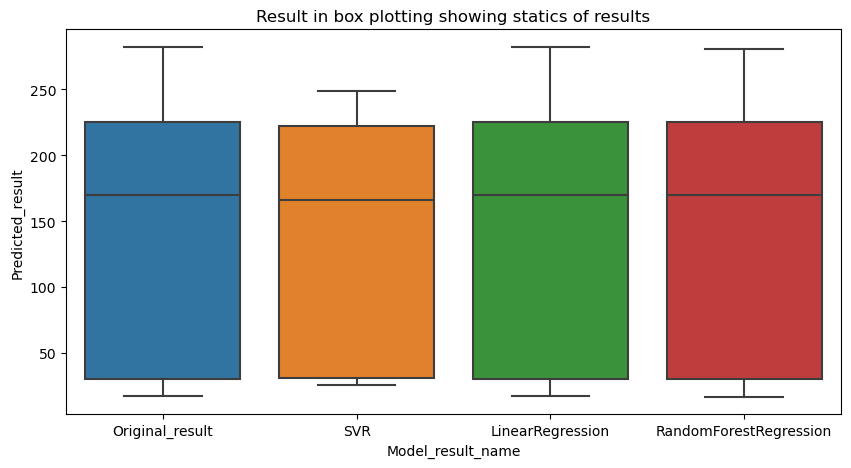

In [72]:
plt.figure(figsize = (10, 5))
sns.boxplot(model_result)
plt.xlabel('Model_result_name')
plt.ylabel('Predicted_result')
plt.title("Result in box plotting showing statics of results")